In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import importlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import sys
import os

# Get the absolute path to the 'src' directory
sys.path.append(os.path.abspath("../.."))
print(os.path.abspath("../.."))
project_root = os.path.abspath("../..")
print(sys.path)
print(project_root)

/home/julia/school/bakalarka/hospital_sim
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages', '/home/julia/school/bakalarka/hospital_sim']
/home/julia/school/bakalarka/hospital_sim


In [ ]:
# graph_path = "../../input/layouts/toScaleLayout.json"
# people_path = "../../input/people/manyPeople.json"
# event_path = "../../input/events/reqReorder.json"
# nurse_log_path = "../../output/nurseLog.csv"
# event_log_path = "../../output/eventLog.csv"

In [3]:
# import src.data_generator as dg
# import src.main
# importlib.reload(src.main)
from src.main import App
from src.data_generator import DataGenerator
from src.process_data import DataProcessor

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
exp_layout = "../../input/layouts/expLayout.json"
two_nurses = "../../input/people/expPeople1.json" #two nurses, 4 patients each, 2 patients per room
one_nurse = project_root + "/input/people/expOneNurse.json"
exp_nurse_log = project_root + "/output/expNurseLog.csv"
exp_event_log = project_root + "/output/expEventLog.csv"
event_paths = ["expEvents1.json",
"expEvents2.json",
"expEvents3.json",
"expEvents4.json",
"expEvents5.json",
"expEvents6.json",
"expEvents7.json",
"expEvents8.json",]

In [5]:
full_event_paths = list(map(lambda x: project_root + "/input/events/" + x, event_paths))
print(full_event_paths)


['/home/julia/school/bakalarka/hospital_sim/input/events/expEvents1.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents2.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents3.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents4.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents5.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents6.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents7.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents8.json']


In [6]:
params1 = {"event_path" : full_event_paths[0], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": True}
params2 = {"event_path" : full_event_paths[1], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": True}
params3 = {"event_path" : full_event_paths[2], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": True}
params4 = {"event_path" : full_event_paths[3], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": True}
params5 = {"event_path" : full_event_paths[4], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": False}
params6 = {"event_path" : full_event_paths[5], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": False}
params7 = {"event_path" : full_event_paths[6], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": False}
params8 = {"event_path" : full_event_paths[7], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": False}
params_lst = [params1, params2, params3, params4, params5, params6, params7, params8]

In [7]:
def generate_exp(params):
    # exp_events = project_root + "/input/events/" + exp_event_path
    # if nurse_cnt == 1:
    #     people_file = one_nurse
    # elif nurse_cnt == 2:
    #     people_file = two_nurses
    event_gen = DataGenerator(rnd=42, layout_file=exp_layout, people_file=params["people_path"], out_file=params["event_path"], request_assigner=params["request_assigner"],
                               include_plans=params["include_plans"])
    event_gen.create_events() 

In [8]:
def run_exp(params):
    app = App(exp_layout, params["people_path"], params["event_path"], exp_nurse_log, exp_event_log)
    app.run_simulation()

In [9]:
def process_nurse_data(params):
    dp = DataProcessor(exp_nurse_log, exp_event_log, params["people_path"])
    all_results = []
    for i in range(params["nurse_cnt"]):
        nurse_results = {}
        nurse_results["nurse_dst_walked"] = dp.nurse_dst_walked(i)
        nurse_results["nurse_time_walked"] = dp.nurse_time_walked(i)
        nurse_results["nurse_time_at_own_patients"] = dp.nurse_time_at_own_patients(i)
        nurse_results["nurse_time_at_other_patients"] = dp.nurse_time_at_other_patients(i)
        nurse_results["nurse_time_resting"] = dp.nurse_time_resting(i)
        all_results.append(nurse_results)
    return all_results

In [10]:
def process_patient_data(params):
    dp = DataProcessor(exp_nurse_log, exp_event_log, params["people_path"])
    all_results = []
    for i in range(8):
        patient_results = []
        for lvl in range(4):
            if lvl == 0:
                lvl = None

            level_results = {}
            level_results["total_time_waiting"] = dp.patient_total_time_waiting(i, lvl)
            level_results["avg_time_waiting"] = dp.patient_avg_time_waiting(i, lvl) #could be changed to histogram somehow
            patient_results.append(level_results)
        all_results.append(patient_results)
    return all_results


In [ ]:
for params in params_lst:
    generate_exp(params)

In [11]:
nurse_results = []
patient_results = []
done = []
for i, params in enumerate(params_lst):  
    run_exp(params)
    done.append(i)
    exp_results_nurse = process_nurse_data(params)
    nurse_results.append(exp_results_nurse)
    exp_results_patient = process_patient_data(params)
    patient_results.append(exp_results_patient)

importing
{'time': 2867.554752696838, 'event': 0, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 1, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 2, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 3, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 4, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 5, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 6, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 7, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 167.9963875690155

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 2867.554752696838, 'event': 77, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 78, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 79, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 80, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 81, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 82, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 83, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 84, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 167.99638

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 2867.554752696838, 'event': 172, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 173, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 174, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 175, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 176, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 177, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 178, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 179, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 1

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 2867.554752696838, 'event': 246, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 247, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 248, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 249, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 250, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 251, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 252, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 253, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 1

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 0, 'event': 416, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 77.0, 'event': 417, 'action': 'planned start', 'patient': 1, 'type': 'request', 'request_level': 1}
{'time': 154.0, 'event': 418, 'action': 'planned start', 'patient': 2, 'type': 'request', 'request_level': 1}
{'time': 231.0, 'event': 419, 'action': 'planned start', 'patient': 3, 'type': 'request', 'request_level': 1}
{'time': 0, 'event': 420, 'action': 'planned start', 'patient': 4, 'type': 'request', 'request_level': 1}
{'time': 77.0, 'event': 421, 'action': 'planned start', 'patient': 5, 'type': 'request', 'request_level': 1}
{'time': 154.0, 'event': 422, 'action': 'planned start', 'patient': 6, 'type': 'request', 'request_level': 1}
{'time': 231.0, 'event': 423, 'action': 'planned start', 'patient': 7, 'type': 'request', 'request_level': 1}
{'time': 1800, 'event': 424, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 18

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 0, 'event': 511, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 77.0, 'event': 512, 'action': 'planned start', 'patient': 1, 'type': 'request', 'request_level': 1}
{'time': 154.0, 'event': 513, 'action': 'planned start', 'patient': 2, 'type': 'request', 'request_level': 1}
{'time': 231.0, 'event': 514, 'action': 'planned start', 'patient': 3, 'type': 'request', 'request_level': 1}
{'time': 308.0, 'event': 515, 'action': 'planned start', 'patient': 4, 'type': 'request', 'request_level': 1}
{'time': 385.0, 'event': 516, 'action': 'planned start', 'patient': 5, 'type': 'request', 'request_level': 1}
{'time': 462.0, 'event': 517, 'action': 'planned start', 'patient': 6, 'type': 'request', 'request_level': 1}
{'time': 539.0, 'event': 518, 'action': 'planned start', 'patient': 7, 'type': 'request', 'request_level': 1}
{'time': 1800, 'event': 519, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [21]:
run_exp(params_lst[0])

importing
{'time': 2867.554752696838, 'event': 1892, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 1893, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 1894, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 1895, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 1896, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 1897, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 1898, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 1899, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'

In [12]:
res = process_patient_data(params_lst[0])
for i, patient in enumerate(res):
    print(i)
    for lvl in patient:
        print(lvl)

0
{'total_time_waiting': np.float64(28150.649007704298), 'avg_time_waiting': np.float64(2559.1499097912997)}
{'total_time_waiting': np.float64(5531.095482588393), 'avg_time_waiting': np.float64(1382.7738706470982)}
{'total_time_waiting': np.float64(3838.743537083876), 'avg_time_waiting': np.float64(3838.743537083876)}
{'total_time_waiting': np.float64(18780.80998803203), 'avg_time_waiting': np.float64(3130.1349980053383)}
1
{'total_time_waiting': np.float64(25142.75140473391), 'avg_time_waiting': np.float64(2285.704673157628)}
{'total_time_waiting': np.float64(4951.7215821279315), 'avg_time_waiting': np.float64(1237.9303955319829)}
{'total_time_waiting': np.float64(13781.483798412493), 'avg_time_waiting': np.float64(4593.827932804164)}
{'total_time_waiting': np.float64(6409.546024193483), 'avg_time_waiting': np.float64(1602.3865060483708)}
2
{'total_time_waiting': np.float64(8324.547764833978), 'avg_time_waiting': np.float64(1387.4246274723298)}
{'total_time_waiting': np.float64(3999.1

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [13]:
for res in nurse_results:
    print(res)

[{'nurse_dst_walked': 218.0, 'nurse_time_walked': np.float64(218.0), 'nurse_time_at_own_patients': np.float64(2729.925981804981), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(1654.8915498724905)}, {'nurse_dst_walked': 320.0, 'nurse_time_walked': np.float64(320.0), 'nurse_time_at_own_patients': np.float64(3566.151891352622), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(716.6656403248494)}]
[{'nurse_dst_walked': 557.2815682753399, 'nurse_time_walked': np.float64(557.2815682753399), 'nurse_time_at_own_patients': np.float64(2063.3522209903617), 'nurse_time_at_other_patients': np.float64(1144.2299892111591), 'nurse_time_resting': np.float64(613.09034225294)}, {'nurse_dst_walked': 498.17583435838424, 'nurse_time_walked': np.float64(498.17583435838424), 'nurse_time_at_own_patients': np.float64(2559.2987038942947), 'nurse_time_at_other_patients': np.float64(897.5054811534139), 'nurse_time_resting': np.float64(422.97410132370806)}]
[{'nurse_dst_walk

In [14]:
for i, exp in enumerate(patient_results):
    print("\nexperiment ", i)
    for j, patient in enumerate(exp):
        print("patient", j)
        for k, lvl in enumerate(patient):
            print("level", k, lvl)


experiment  0
patient 0
level 0 {'total_time_waiting': np.float64(3491.5104694574807), 'avg_time_waiting': np.float64(387.9456077174979)}
level 1 {'total_time_waiting': np.float64(2314.033907600383), 'avg_time_waiting': np.float64(1157.0169538001915)}
level 2 {'total_time_waiting': np.float64(99.4284509296881), 'avg_time_waiting': np.float64(99.4284509296881)}
level 3 {'total_time_waiting': np.float64(1078.0481109274097), 'avg_time_waiting': np.float64(179.67468515456827)}
patient 1
level 0 {'total_time_waiting': np.float64(2621.1883284078986), 'avg_time_waiting': np.float64(291.2431476008776)}
level 1 {'total_time_waiting': np.float64(1403.2223351501448), 'avg_time_waiting': np.float64(701.6111675750724)}
level 2 {'total_time_waiting': np.float64(712.5940572335456), 'avg_time_waiting': np.float64(237.53135241118187)}
level 3 {'total_time_waiting': np.float64(505.37193602420825), 'avg_time_waiting': np.float64(126.34298400605206)}
patient 2
level 0 {'total_time_waiting': np.float64(14

[np.float64(3491.5104694574807), np.float64(2621.1883284078986), np.float64(1473.4999916133502), np.float64(2399.065013473368), np.float64(8406.638274685183), np.float64(6690.551417505502), np.float64(9575.10807240368), np.float64(3301.9958509181806), np.float64(2393.986003122819), np.float64(5192.494317694885), np.float64(1493.7200787735976), np.float64(2479.895944641341), np.float64(6154.389146898597), np.float64(11760.74378262363), np.float64(8346.98188047158), np.float64(2590.1290079221776), np.float64(13431.81404184104), np.float64(20205.974125469424), np.float64(11082.16553403094), np.float64(16549.79308410425), np.float64(25102.72186313176), np.float64(21387.622864413872), np.float64(31485.84453323453), np.float64(10991.665631940483), np.float64(25868.789372896885), np.float64(23131.20239270719), np.float64(5806.691885017421), np.float64(10395.344915143574), np.float64(21006.993623411036), np.float64(32872.472906229574), np.float64(31118.887817568324), np.float64(18128.608208177

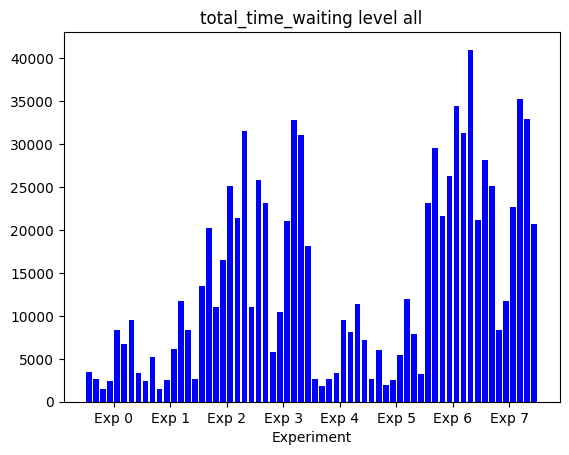

[np.float64(2314.033907600383), np.float64(1403.2223351501448), np.float64(550.6976085059678), np.float64(2216.2767173837474), np.float64(7741.313188201915), np.float64(2411.8330533455505), np.float64(7960.362476424163), np.float64(2316.792113065308), np.float64(1110.4249952945183), np.float64(1066.6939575818208), np.float64(149.3353579068921), np.float64(694.244330070595), np.float64(2160.3725864906028), np.float64(331.6498579239076), np.float64(2587.1796481270812), np.float64(236.60891764366488), np.float64(11610.040578974626), np.float64(11477.696389823013), np.float64(4993.213178733202), np.float64(16344.678808493783), np.float64(22125.07577811902), np.float64(5654.297393193143), np.float64(21978.51839460358), np.float64(5636.890526756222), np.float64(3438.5760863616088), np.float64(3111.51280868184), np.float64(1527.3438547687952), np.float64(5947.070836600566), np.float64(8266.598482261386), np.float64(1864.3829475067719), np.float64(7491.315254061747), np.float64(1975.7400675383

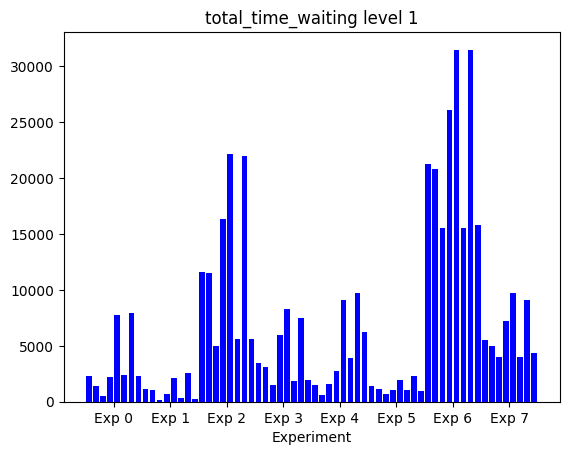

[np.float64(99.4284509296881), np.float64(712.5940572335456), np.float64(453.46968698380124), np.float64(182.7882960896211), np.float64(588.1533502923903), np.float64(1932.1120953405969), np.float64(432.1232985337558), np.float64(296.9956713186634), np.float64(622.4832642280976), np.float64(3591.3405069096634), np.float64(1051.3376624716939), np.float64(1785.6516145707458), np.float64(3896.844824217116), np.float64(5580.876324568384), np.float64(2252.042777288365), np.float64(2209.277147979205), np.float64(99.4284509296881), np.float64(4793.993421273728), np.float64(1277.840267295157), np.float64(205.11427561046662), np.float64(1838.0820368542632), np.float64(7703.627899126764), np.float64(5603.693206235636), np.float64(4322.914036439212), np.float64(3792.6584774387197), np.float64(13643.228619477024), np.float64(3979.9417559912854), np.float64(4448.274078543008), np.float64(12663.223404958771), np.float64(18063.272357200138), np.float64(9828.870376465553), np.float64(9258.88924068613)

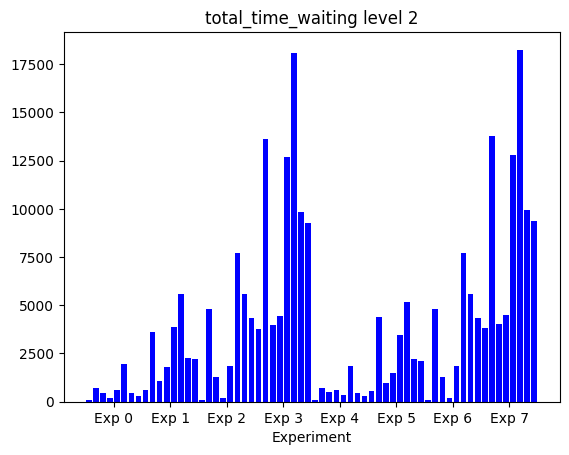

[np.float64(1078.0481109274097), np.float64(505.37193602420825), np.float64(469.3326961235811), 0, np.float64(77.17173619087816), np.float64(2346.606268819356), np.float64(1182.6222974457628), np.float64(688.2080665342091), np.float64(661.0777436002035), np.float64(534.4598532034004), np.float64(293.0470583950117), 0, np.float64(97.17173619087816), np.float64(5848.217600131339), np.float64(3507.7594550561325), np.float64(144.24294229930774), np.float64(1722.3450119367258), np.float64(3934.2843143726836), np.float64(4811.112088002583), 0, np.float64(1139.5640481584774), np.float64(8029.697572093962), np.float64(3903.6329323953164), np.float64(1031.8610687450494), np.float64(18637.55480909656), np.float64(6376.460964548327), np.float64(299.40627425734084), 0, np.float64(77.17173619087816), np.float64(12944.817601522664), np.float64(13798.702187041024), np.float64(6893.97889995289), np.float64(1070.0481109274097), np.float64(505.37193602420825), np.float64(461.3326961235811), 0, np.float6

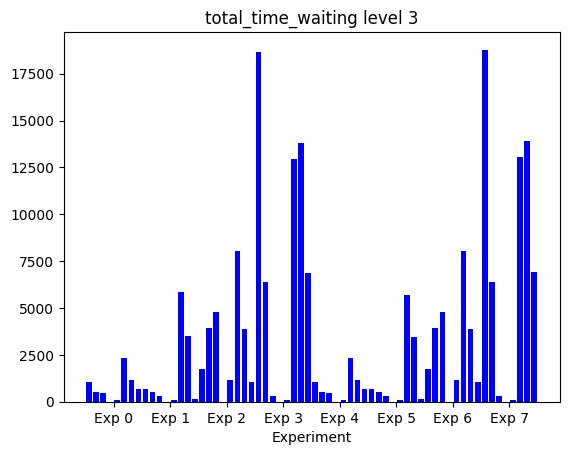

[np.float64(387.9456077174979), np.float64(291.2431476008776), np.float64(368.37499790333754), np.float64(599.766253368342), np.float64(934.0709194094648), np.float64(743.394601945056), np.float64(1063.9008969337422), np.float64(825.4989627295452), np.float64(265.99844479142433), np.float64(576.9438130772094), np.float64(373.4300196933994), np.float64(619.9739861603352), np.float64(683.8210163220663), np.float64(1306.7493091804033), np.float64(927.4424311635087), np.float64(647.5322519805444), np.float64(1492.423782426782), np.float64(2245.1082361632693), np.float64(2770.541383507735), np.float64(4137.448271026063), np.float64(2789.191318125751), np.float64(2376.4025404904296), np.float64(3498.4271703593927), np.float64(2747.9164079851207), np.float64(2874.309930321876), np.float64(2570.1335991896876), np.float64(1451.6729712543552), np.float64(2598.8362287858936), np.float64(2334.1104026012263), np.float64(3652.4969895810636), np.float64(3457.654201952036), np.float64(4532.15205204434

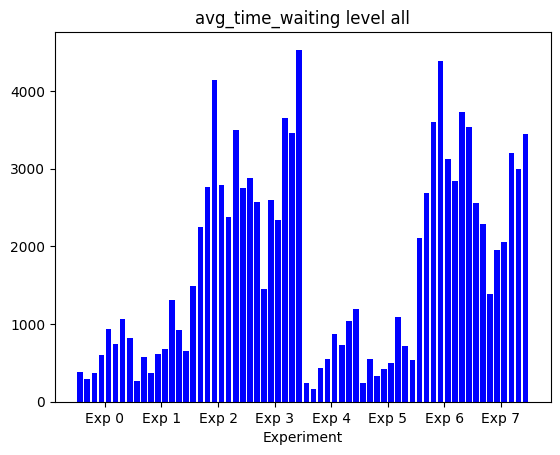

[np.float64(1157.0169538001915), np.float64(701.6111675750724), np.float64(550.6976085059678), np.float64(738.7589057945825), np.float64(1935.3282970504788), np.float64(2411.8330533455505), np.float64(1990.0906191060408), np.float64(2316.792113065308), np.float64(555.2124976472592), np.float64(533.3469787909104), np.float64(149.3353579068921), np.float64(231.41477669019832), np.float64(540.0931466226507), np.float64(331.6498579239076), np.float64(646.7949120317703), np.float64(236.60891764366488), np.float64(5805.020289487313), np.float64(5738.848194911507), np.float64(4993.213178733202), np.float64(5448.226269497928), np.float64(5531.268944529755), np.float64(5654.297393193143), np.float64(5494.629598650895), np.float64(5636.890526756222), np.float64(1719.2880431808044), np.float64(1555.75640434092), np.float64(1527.3438547687952), np.float64(1982.3569455335219), np.float64(2066.6496205653466), np.float64(1864.3829475067719), np.float64(1872.8288135154367), np.float64(1975.74006753834

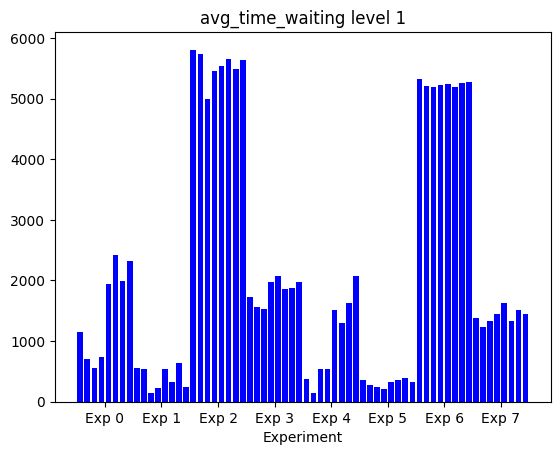

[np.float64(99.4284509296881), np.float64(237.53135241118187), np.float64(453.46968698380124), np.float64(182.7882960896211), np.float64(196.05111676413011), np.float64(483.0280238351492), np.float64(216.0616492668779), np.float64(148.4978356593317), np.float64(622.4832642280976), np.float64(1197.1135023032211), np.float64(1051.3376624716939), np.float64(1785.6516145707458), np.float64(1298.9482747390387), np.float64(1395.219081142096), np.float64(1126.0213886441825), np.float64(1104.6385739896025), np.float64(99.4284509296881), np.float64(1597.9978070912427), np.float64(1277.840267295157), np.float64(205.11427561046662), np.float64(612.6940122847544), np.float64(1925.906974781691), np.float64(2801.846603117818), np.float64(2161.457018219606), np.float64(3792.6584774387197), np.float64(4547.742873159008), np.float64(3979.9417559912854), np.float64(4448.274078543008), np.float64(4221.074468319591), np.float64(4515.818089300034), np.float64(4914.435188232776), np.float64(4629.44462034306

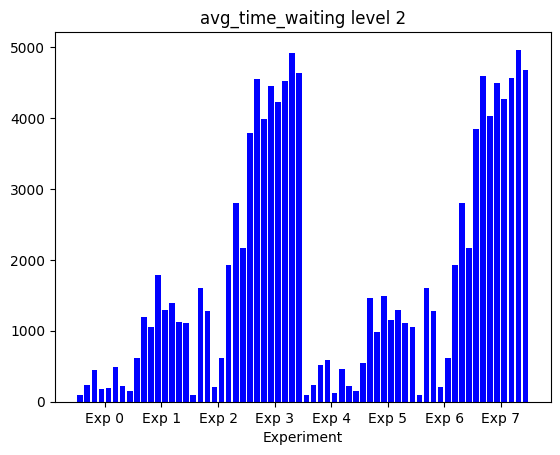

[np.float64(179.67468515456827), np.float64(126.34298400605206), np.float64(234.66634806179056), np.float64(nan), np.float64(38.58586809543908), np.float64(586.651567204839), np.float64(394.20743248192093), np.float64(688.2080665342091), np.float64(110.17962393336724), np.float64(133.6149633008501), np.float64(146.52352919750584), np.float64(nan), np.float64(48.58586809543908), np.float64(1462.0544000328348), np.float64(1169.2531516853776), np.float64(144.24294229930774), np.float64(287.0575019894543), np.float64(983.5710785931709), np.float64(2405.5560440012914), np.float64(nan), np.float64(569.7820240792387), np.float64(2007.4243930234904), np.float64(1301.2109774651055), np.float64(1031.8610687450494), np.float64(3106.2591348494266), np.float64(1594.1152411370817), np.float64(149.70313712867042), np.float64(nan), np.float64(38.58586809543908), np.float64(3236.204400380666), np.float64(4599.567395680341), np.float64(6893.97889995289), np.float64(178.34135182123495), np.float64(126.34

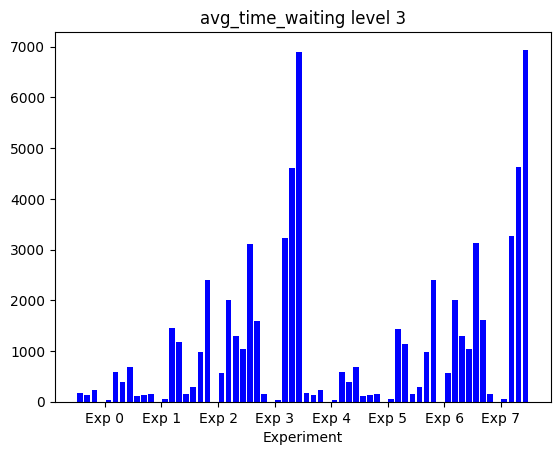

In [15]:
def plot_patient_stat(stat_name, level):
    if level == 0:
        level_title = "all"
    else:
        level_title = level
    values = []
    for i, exp in enumerate(patient_results):
        for j, patient in enumerate(exp):
            values.append(patient[level][stat_name])

    print(values)
    print(len(values))

    labels = ["Exp " + str(x) for x in range(8)]
    # colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(values))]
    x = np.arange(len(values))
    plt.bar(x, values, color="blue")
    plt.xticks(ticks=np.arange(3.5, len(values), 8), labels=labels)

    plt.xlabel("Experiment")
    plt.ylabel("")
    plt.title(stat_name + " level " + str(level_title))

    # Show the chart
    plt.show()

for i in range(4):
    plot_patient_stat("total_time_waiting", i)

for i in range(4):
    plot_patient_stat("avg_time_waiting", i)

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[218.0, 320.0, 557.2815682753399, 498.17583435838424, 923.4145994955186, 0, 984.0, 0, 214.0, 300.0, 598.0402278672973, 512.1758343583842, 953.4145994955186, 0, 1104.170119290312, 0]


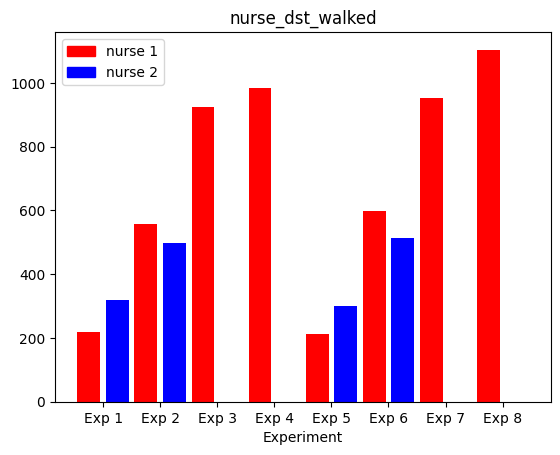

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[np.float64(218.0), np.float64(320.0), np.float64(557.2815682753399), np.float64(498.17583435838424), np.float64(923.4145994955186), 0, np.float64(984.0000000000005), 0, np.float64(214.0), np.float64(300.0), np.float64(598.0402278672977), np.float64(512.1758343583842), np.float64(953.4145994955186), 0, np.float64(1104.170119290312), 0]


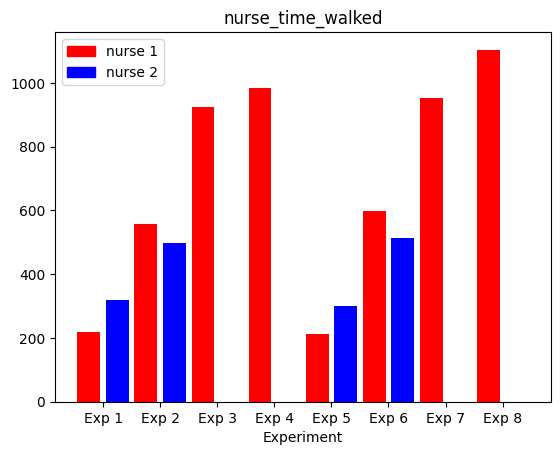

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[np.float64(2948.204092214728), np.float64(3699.1063505613142), np.float64(2122.879831284106), np.float64(2561.576153340074), np.float64(6343.376209951182), 0, np.float64(6750.540264651179), 0, np.float64(2845.1313744221698), np.float64(3699.1063505613124), np.float64(2100.7145321291796), np.float64(2630.178343860761), np.float64(6343.376209951182), 0, np.float64(6738.580304532939), 0]


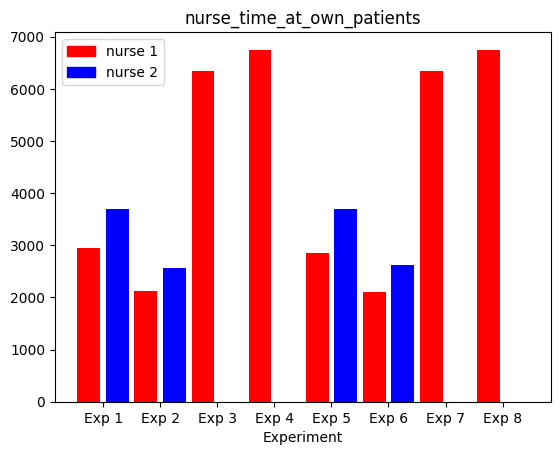

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[0, 0, np.float64(1144.2299892111591), np.float64(897.5054811534139), 0, 0, 0, 0, 0, 0, np.float64(1061.1148883044684), np.float64(829.702357408821), 0, 0, 0, 0]


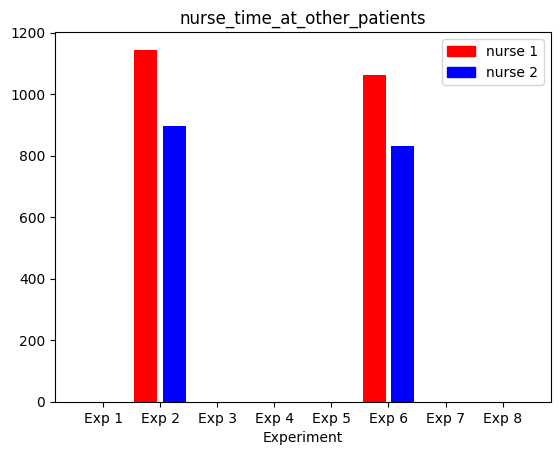

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[np.float64(1436.6134394627434), np.float64(583.7111811161571), np.float64(553.5627319591958), np.float64(420.6966518779286), np.float64(1198.6416569441583), 0, np.float64(677.0221216147816), 0, np.float64(1490.022232410818), np.float64(550.0472562716755), np.float64(547.593941816886), np.float64(335.4070544898659), np.float64(1168.6416569441583), 0, np.float64(614.8970220878664), 0]


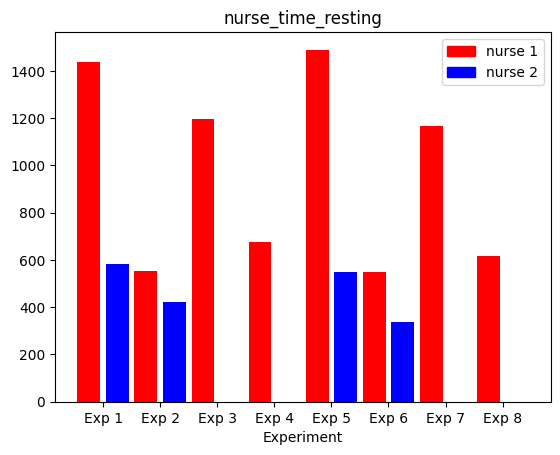

In [12]:
def plot_nurse_stat(stat_name):
    values = []
    for res in nurse_results:
        values.append(res[0][stat_name])
        if len(res) == 2:
            values.append(res[1][stat_name])
        else:
            values.append(0)

    labels = ["Exp " + str(x + 1) for x in range(8)]
    colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(values))]
    print(labels)
    print(values)
    x = np.arange(len(values))

    plt.bar(x, values, color=colors)

    plt.xticks(ticks=np.arange(0.5, len(values), 2), labels=labels)

    # red_patch = plt.Line2D([0], [0], color='red', lw=4, label='nurse 1')
    # blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='nurse 2')
    red_patch = mpatches.Circle((0, 0), radius=0.1, color='red', label='nurse 1')
    blue_patch = mpatches.Circle((0, 0), radius=0.1, color='blue', label='nurse 2')
    plt.legend(handles=[red_patch, blue_patch])

    # Customize chart
    plt.xlabel("Experiment")
    plt.ylabel("")
    plt.title(stat_name)

    # Show the chart
    plt.show()

nurse_stats = nurse_results[0][0].keys()
for stat in nurse_stats:
    plot_nurse_stat(stat)

In [14]:
df = pd.read_csv(project_root + "/output/testNurseLog.csv")
df

,time,nurse,x,y,event,action,patient
0,0.000000,0,3.0,3.0,131,assign event,0.0
1,3.000000,0,6.0,3.0,131,move to,0.0
2,7.000000,0,6.0,7.0,131,move to,0.0
3,10.000000,0,3.0,7.0,131,move to,0.0
4,25.027670,0,3.0,7.0,131,unassign event,0.0
...,...,...,...,...,...,...,...
645,8401.562386,0,3.0,7.0,164,assign event,NaN
646,8404.562386,0,6.0,7.0,164,move to,NaN
647,8408.562386,0,6.0,3.0,164,move to,NaN
648,8411.562386,0,3.0,3.0,164,move to,NaN


In [17]:
time_rows = df[(df['nurse'] == 0) & (df['patient'] == 0) & (df['action'] == "time at patient")].event.tolist()
time_rows


[82, 131, 81, 79, 139, 75, 80, 78, 76, 77, 74]

In [18]:
df115 = df[df['event'] == 82].reset_index(drop=True)
df115

,time,nurse,x,y,event,action,patient
0,167.996388,0,3.0,7.0,82,assign event,0.0
1,266.406885,0,3.0,7.0,82,time at patient,0.0
2,266.406885,0,3.0,7.0,82,finish event,0.0


In [19]:
# Find the index of the row where action is 'time at patient'
time_at_patient_idx = df115[df115['action'] == 'time at patient'].index[0]
print(time_at_patient_idx)

total_time = 0
int_end_time = df115.loc[time_at_patient_idx].time #end of current calculated interval
# Iterate backward from this index to find the first occurrence of 'move to'
for idx in range(time_at_patient_idx, -1, -1):
    line = df115.loc[idx]
    action = line["action"]
    if action == 'move to' or idx == 0:
        total_time += int_end_time - line["time"]
        break
    if action == 'assign event':
        total_time += int_end_time - line["time"]
    elif action == 'unassign event':
        int_end_time = line["time"]
    print(idx, action, total_time)

print(total_time)

1
1 time at patient 0
98.41049763255538


In [29]:
df115.iloc[-1]

time        2928.664217
nurse                 0
x                  14.0
y                   3.0
event               115
action     finish event
patient             5.0
Name: 210, dtype: object